# FRAUD_DETECTION BY APPLYING MACHINE LEARNING CONCEPTS

                   by- Aayush Ahire 

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [60]:
# Loading dataset

In [2]:
df=pd.read_csv('/Users/aayushsahire/Downloads/Fraud.csv')

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [7]:
df.head(100)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
95,1,TRANSFER,710544.77,C835773569,0.0,0.00,C1359044626,738531.50,16518.36,0,0
96,1,TRANSFER,581294.26,C843299092,0.0,0.00,C1590550415,5195482.15,19169204.93,0,0
97,1,TRANSFER,11996.58,C605982374,0.0,0.00,C1225616405,40255.00,0.00,0,0
98,1,PAYMENT,2875.10,C1412322831,15443.0,12567.90,M1651262695,0.00,0.00,0,0


In [8]:
df.tail(100)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362520,735,TRANSFER,417103.68,C336307904,417103.68,0.0,C1155915285,0.00,0.00,1,0
6362521,735,CASH_OUT,417103.68,C1450763584,417103.68,0.0,C1377830519,34232.06,451335.75,1,0
6362522,735,TRANSFER,92735.71,C1351323617,92735.71,0.0,C413722554,0.00,0.00,1,0
6362523,735,CASH_OUT,92735.71,C786761311,92735.71,0.0,C570188819,921583.30,1014319.01,1,0
6362524,735,TRANSFER,123146.28,C1625883009,123146.28,0.0,C918154390,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [4]:
df.shape

(6362620, 11)

In [5]:
# checking the null data
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
#checking the datatypes of the data
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

Since there is no null values let's start with analysis

In [11]:
legal=len(df[df.isFraud==0])
fraud=len(df[df.isFraud==1])
legal_percent=(legal/(fraud+legal))*100
fraud_percent=(fraud/(fraud+legal))*100

print("Number of legal transactions: ",legal)
print("Number of fraud transactions: ",fraud)
print("Percentage of legal transactions: ",(legal_percent))
print("Percentage of fraud transactions: ",(fraud_percent))

Number of legal transactions:  6354407
Number of fraud transactions:  8213
Percentage of legal transactions:  99.87091795518198
Percentage of fraud transactions:  0.12908204481801522


The above results shows that the data is unbalanced because percentage of legal transactions = 99.87% and percentage of fraud transactions = 0.129%.
Decision Trees and Random Forests will be great methods for imbalanced data

In [14]:
X=df[df['nameDest'].str.contains('M')]
X.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0


For merchants(M) there is no information regarding the attributes oldbalanceDest and newbalanceDest

# Visualisation

<AxesSubplot:>

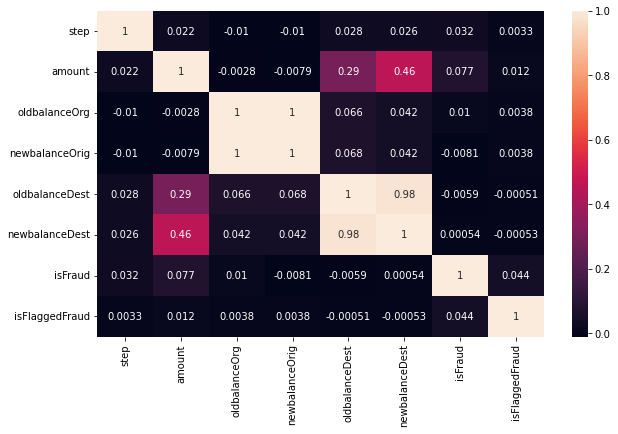

In [16]:
# correlation heatmap

corr=df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

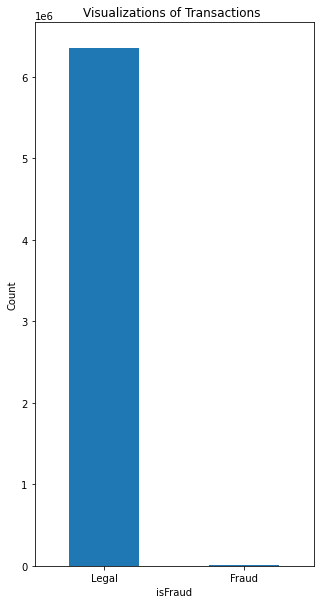

In [17]:
# Number of Legal and Fraud Transactions

plt.figure(figsize=(5,10))
labels=["Legal","Fraud"]
count_var=df.value_counts(df['isFraud'],sort=True)
count_var.plot(kind="bar",rot=0)
plt.title("Visualizations of Transactions ")
plt.ylabel("Count")
plt.xticks(range(2),labels)
plt.show()

In [61]:
# creating copy of original dataset
new_df=df.copy()
new_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


Since we have 3 object datatype.We need to label encode them in order to check multicolinearity

In [33]:
# Checking how many attributes are dtype: object

objList = new_df.select_dtypes(include = "object").columns
print (objList)

Index(['type', 'nameOrig', 'nameDest'], dtype='object')


In [34]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    new_df[feat] = le.fit_transform(new_df[feat].astype(str))

print (new_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int64  
 2   amount          float64
 3   nameOrig        int64  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int64  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(6)
memory usage: 534.0 MB
None


In [35]:
new_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0
1,1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0
2,1,4,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0
3,1,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0
4,1,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0


In [38]:
# MULTICOLINEARITY

## Importing library from VIF(Variance Inflation Factor)

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(df):
    
    #calculating VIF
    vif=pd.DataFrame()
    vif["variables"]=df.columns
    vif["VIF"]=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    return(vif)

calc_vif(new_df)

,variables,VIF
0,step,2.791610
1,type,4.467405
2,amount,4.149312
3,nameOrig,2.764234
4,oldbalanceOrg,576.803777
5,newbalanceOrig,582.709128
6,nameDest,3.300975
7,oldbalanceDest,73.349937
8,newbalanceDest,85.005614
9,isFraud,1.195305


On observation we see that  oldbalanceOrg and newbalanceOrig have too high VIF(variance inflation factor) thus they are highly correlated. Similarly oldbalanceDest , newbalanceDest and also nameDest is connected to nameOrig.

Thus combining these pairs of collinear attributes and droping the individual ones will be the best option.

In [39]:
new_df['Actual_amount_origin'] = new_df.apply(lambda x:x['oldbalanceOrg']-x['newbalanceOrig'],axis=1)
new_df['Actual_amount_destination']= new_df.apply(lambda x:x['oldbalanceDest']-x['newbalanceDest'],axis=1)
new_df['TransactionPath'] = new_df.apply(lambda x: x['nameOrig'] + x['nameDest'],axis=1)

#Dropping the columns
new_df = new_df.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','step','nameOrig','nameDest'],axis=1)

calc_vif(new_df)

,variables,VIF
0,type,2.687803
1,amount,3.818902
2,isFraud,1.184479
3,isFlaggedFraud,1.002546
4,Actual_amount_origin,1.307910
5,Actual_amount_destination,3.754335
6,TransactionPath,2.677167


<AxesSubplot:>

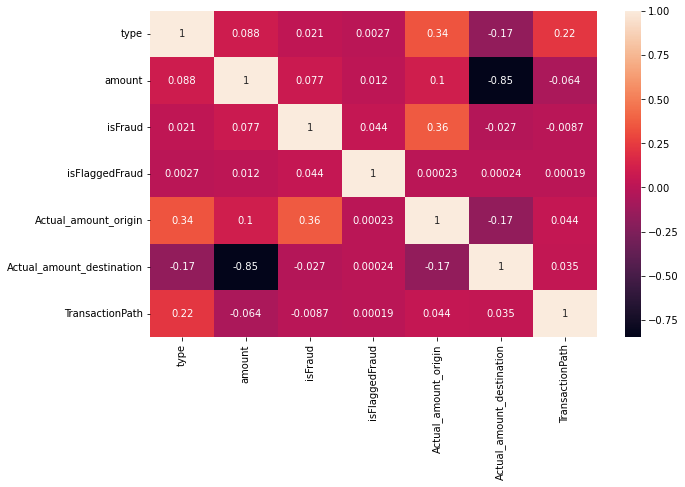

In [41]:
# plotting heatmaps for correlation
corr=new_df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

3. How did you select variables to be included in the model? 

Ans: Using the VIF(varience inflation factor) values and correlation heatmap. We just need to check if there are any two attributes highly correlated to each other and then drop the one which is less correlated to the isFraud Attribute.

# Model Building

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import itertools 
from collections import Counter
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

### Normalizing Amount

In [44]:
# Perform Scalinging

scaler = StandardScaler()
new_df["NormalizedAmount"] = scaler.fit_transform(new_df["amount"].values.reshape(-1, 1))
new_df.drop(["amount"], inplace= True, axis= 1)

Y = new_df["isFraud"]
X = new_df.drop(["isFraud"], axis= 1)

Normalizing the complete dataset  may lead to decrease in accuracy of model.

### Train-Test Split

In [46]:
#splitting the data

(X_train,X_test,Y_train,Y_test)=train_test_split(X,Y,test_size=0.3,random_state=42)
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)


Shape of X_train:  (4453834, 6)
Shape of X_test:  (1908786, 6)


### Model Training

In [47]:
# DECISION TREE

decision_tree=DecisionTreeClassifier()
decision_tree.fit(X_train,Y_train)

Y_pred_dt=decision_tree.predict(X_test)
decision_tree_score=decision_tree.score(X_test,Y_test)*100

In [48]:
# Random Forest
random_forest=RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train,Y_train)
Y_pred_rf= random_forest.predict(X_test)
random_forest_score= random_forest.score(X_test,Y_test)*100

In [50]:
#Evaluation 

#printing scores of our classifiers

print("Decision Tree Score : ",decision_tree_score)
print("Random Forest Score : ",random_forest_score)

Decision Tree Score :  99.92304008935523
Random Forest Score :  99.95882199471286


In [51]:
# Key for Confusion Matrix - DT

print("TP,FP,TN,FN - Decision Tree")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_dt).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

print("///////////////////////////////////////////////////////////////")

# key terms of Confusion Matrix - RF

print("TP,FP,TN,FN - Random Forest")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_rf).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

TP,FP,TN,FN - Decision Tree
True Positives: 1713
False Positives: 747
True Negatives: 1905604
False Negatives: 722
///////////////////////////////////////////////////////////////
TP,FP,TN,FN - Random Forest
True Positives: 1713
False Positives: 64
True Negatives: 1906287
False Negatives: 722


In [ ]:
## Random forest is better than expected

In [52]:
# confusion matrix - DT

confusion_matrix_dt = confusion_matrix(Y_test, Y_pred_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt,)

print("/////////////////////////////////////////////////////////////")

# confusion matrix - RF

confusion_matrix_rf = confusion_matrix(Y_test, Y_pred_rf.round())
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)

Confusion Matrix - Decision Tree
[[1905604     747]
 [    722    1713]]
/////////////////////////////////////////////////////////////
Confusion Matrix - Random Forest
[[1906287      64]
 [    722    1713]]


In [53]:
# classification report - DT

classification_report_dt = classification_report(Y_test, Y_pred_dt)
print("Classification Report - Decision Tree")
print(classification_report_dt)

print("/////////////////////////////////////////////////////////////")

# classification report - RF

classification_report_rf = classification_report(Y_test, Y_pred_rf)
print("Classification Report - Random Forest")
print(classification_report_rf)

Classification Report - Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.70      0.70      0.70      2435

    accuracy                           1.00   1908786
   macro avg       0.85      0.85      0.85   1908786
weighted avg       1.00      1.00      1.00   1908786

/////////////////////////////////////////////////////////////
Classification Report - Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.96      0.70      0.81      2435

    accuracy                           1.00   1908786
   macro avg       0.98      0.85      0.91   1908786
weighted avg       1.00      1.00      1.00   1908786



As there is good precision F1-score,Random Forest comes out better

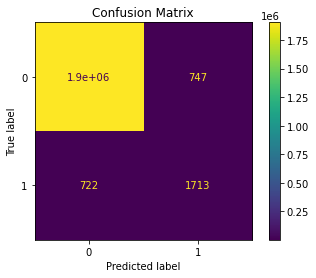

In [54]:
#visualising confusion matrix(decision tree)

disp= ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_dt)
disp.plot()
plt.title('Confusion Matrix')
plt.show()


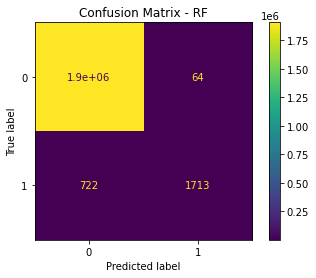

In [55]:
# Visualising confusion matrix(Random Forest)

disp= ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_rf)
disp.plot()
plt.title('Confusion Matrix - RF')
plt.show()

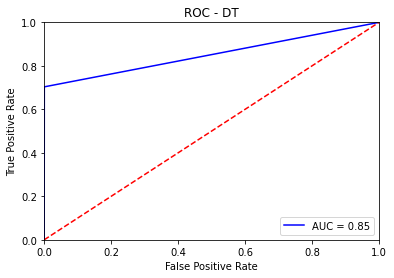

In [56]:
# AUC ROC for DT
# calculate the fpr(false positive rate) and tpr(true positive rate) for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_dt)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - DT')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

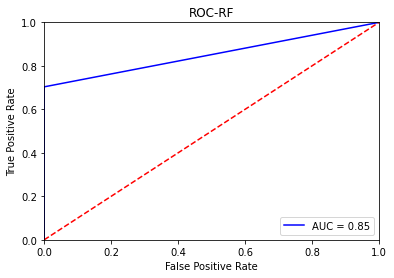

In [59]:
fpr,tpr,threshold= metrics.roc_curve(Y_test,Y_pred_rf)
roc_auc=metrics.auc(fpr,tpr)

plt.title('ROC-RF')
plt.plot(fpr,tpr,'b',label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

THE AUC(Area Under Curve) for both Decision Tree and Random Forest is equal, so both models are perfect.

# Conclusion

Our observation tells us that Accuracy of both Random Forest and Decision Tree is equal, although the precision of Random Forest is more. In a fraud detection model, Precision is highly important because rather than predicting normal transactions correctly we want Fraud transactions to be predicted correctly and Legal to be left off.If either of the 2 reasons are not fulfiiled we may catch the innocent and leave the culprit. 
This is also one of the reason why Random Forest and Decision Tree were used instead of other algorithms.



The reason I  chose this model is because of highly unbalanced dataset (Legal: Fraud :: 99.87:0.13). Random forest makes multiple decision trees which makes it easier (although time taking) for model to understand the data in a simpler way since Decision Tree makes decisions in a boolean way.



Q5.What are the key factors that predict fraudulent customer?

Ans: a)The source of request is secured or not ?

     b)Is the name of organisation asking for money is legal or not ?
     
     c)Transaction history of vendors.
     
     d)Their preferred payment methods

Q6 Do these factors make sense ?

Ans: Yes they matter,every small step determines in order to make transaction legal

Q7.What kind of prevention should be adopted while company update its infrastructure?

Ans: a)Use smart vertified apps only.
    
    b)Browse through secured websites.
    c)Use secured internet connections (USE VPN).
    d)Keep your mobile and laptop security updated.
    e)Don't respond to unsolicited calls/SMS/E-mails.
    f)If you feel like you have been tricked or security compromised, contact your bank immidiately.

Q8.Assuming these actions have been implemented, how would you determine if they work?

Ans: a)Bank sending E-statements.

     b)Customers keeping a check of their account activity.
     c)Always keep a log of your payments.